In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
import cudf

In [4]:
df = cudf.DataFrame(data=list(iris.data), columns=iris.feature_names)

In [5]:
df.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
df['target'] = iris.target

In [7]:
df.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


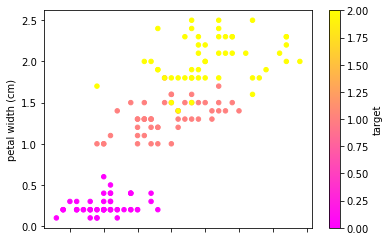

In [9]:
df.to_pandas().plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', c='target', cmap=('spring'))

In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [12]:
from cuml import neighbors

In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [14]:
X = df.drop('target')
y = df.target

# pass features and labels into model
knn.fit(X, y)

In [24]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# 0 = setosa' 1 = 'versicolor' 2 = 'virginica']
# Data: sepal length, sepal width, petal length, petal width

# Comment / Uncoomment different flowers below to see the prediction. 
# test_flower = [3, 5, 4, 2]
test_flower = cudf.DataFrame([5.1, 3.5, 1.4, .2])
# test_flower = [5.1, 4.5, 2.8, 2]

result = knn.predict(test_flower)

result

/home/winston/anaconda3/envs/bsql/lib/python3.7/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


,0
0,0


In [26]:
knn.predict_proba(test_flower)

,0,1,2
0,1.0,0.0,2.382207e-44
